# **HW 3: Convolutional Neural Networks**

In this homework, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the Fashion Minst dataset. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

## Exercise 3.1: Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

### Load Data: Fashion MNIST dataset

We will use the Fashion MNIST dataset, a dataset of Zalando's articles. Each sample is a 28x28 pixels grayscale image, associated with a label from 10 classes:

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Each pixel intensity is represented by a uint8 (byte) from 0 to 255.
We will divide the dataset in training, validation and test set. As you already know, the training set will be used to train the model, the validation set will be used to perform model selection and finally, the test set will be used to asses the performance of the deep network.

Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in grey scale image is just one). Therefore we use [tf.expand_dims](https://www.tensorflow.org/api_docs/python/tf/expand_dims) to transform each image from a matrix to a 3-dimensional tensor. Finaly we have to normalize the input data.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = (
    fashion_mnist.load_data()) #The dataset is already divede in test and training..

#We extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


Let's take a look at a sample of the images in the dataset:

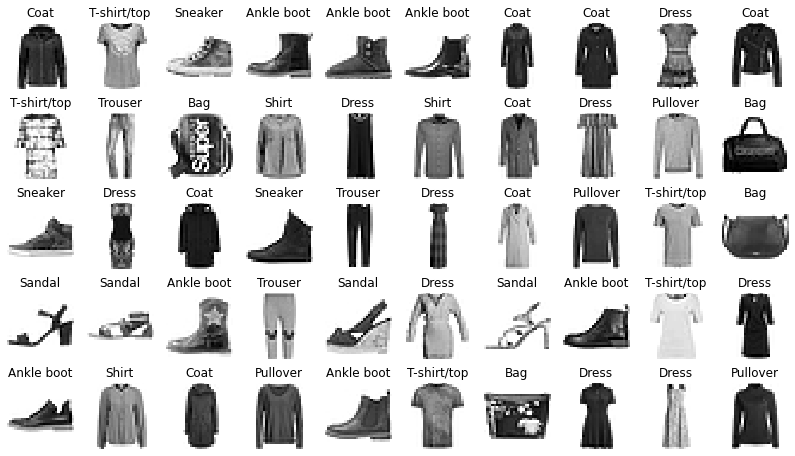

In [3]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols*1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.show()

### Input Normalization:

When using Gradient Descent, it is usually a good idea to ensure that all the features have a similar scale. Try to standardize the pixel values.

In [4]:
#Defining scaled train, validation and test set
#Hint: For each feature (pixel intensity), you must subtract the mean() of that 
#feature (across all instances, so use axis=0) and divide by its standard 
#deviation (std(), again axis=0)

train_mean = np.mean(X_train, axis=0)
train_std = np.std(X_train, axis=0)

X_train = (X_train - train_mean) / train_std 
X_valid = (X_valid - train_mean) / train_std 
X_test = (X_test - train_mean) / train_std

#Add one dimension to manage the channel
X_train=tf.expand_dims(X_train, 3) 
X_valid=tf.expand_dims(X_valid, 3) 
X_test=tf.expand_dims(X_test,3)

#Make sure you compute the means and standard deviations on the training set,
#and use these statistics to scale the training set, the validation set and the
# test set

### Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function to ensure that the sum of all the estimated class probabilities for each image is equal to 1.
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [5]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[28,28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=["accuracy"])


Print the model summary

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                62730     
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the parameter sharing techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model.

In [7]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
430/430 [==============================] - 30s 67ms/step - loss: 0.9976 - accuracy: 0.6916 - val_loss: 0.5035 - val_accuracy: 0.8286
Epoch 2/10
430/430 [==============================] - 27s 63ms/step - loss: 0.4807 - accuracy: 0.8338 - val_loss: 0.4419 - val_accuracy: 0.8516
Epoch 3/10
430/430 [==============================] - 27s 64ms/step - loss: 0.4280 - accuracy: 0.8519 - val_loss: 0.4048 - val_accuracy: 0.8674
Epoch 4/10
430/430 [==============================] - 27s 64ms/step - loss: 0.4006 - accuracy: 0.8612 - val_loss: 0.3904 - val_accuracy: 0.8678
Epoch 5/10
430/430 [==============================] - 26s 61ms/step - loss: 0.3803 - accuracy: 0.8679 - val_loss: 0.3698 - val_accuracy: 0.8734
Epoch 6/10
430/430 [==============================] - 27s 64ms/step - loss: 0.3668 - accuracy: 0.8729 - val_loss: 0.3658 - val_accuracy: 0.8726
Epoch 7/10
430/430 [==============================] - 28s 65ms/step - loss: 0.3532 - accuracy: 0.8765 - val_loss: 0.3684 - val_accuracy:

Plot the loss and the accuracy trends for the training and validation set. Then, compute the result on the test set.

313/313 - 2s - loss: 0.3669 - accuracy: 0.8692
accuracy: 86.92%


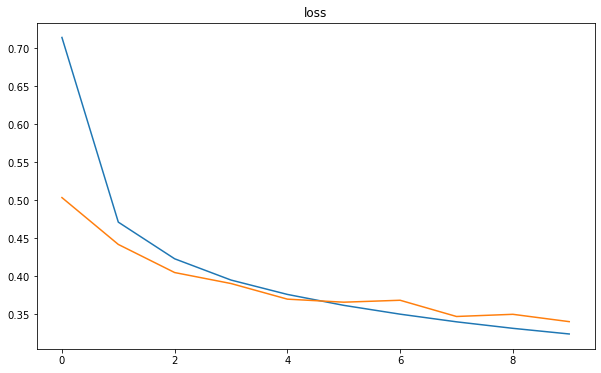

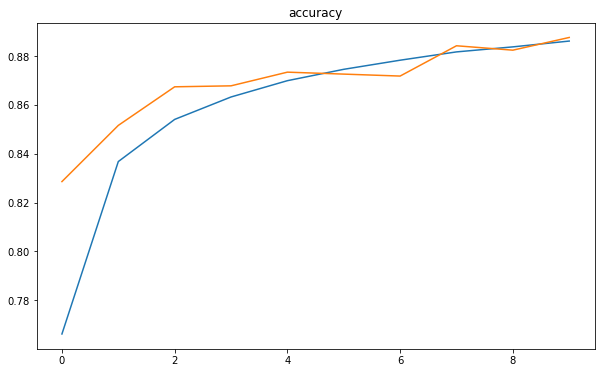

In [8]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'])
  plt.plot(history.epoch,history.history['val_loss'])
  plt.title('loss')

def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'])
  plt.plot(history.epoch,history.history['val_accuracy'])
  plt.title('accuracy')

plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



### Visualize Weights

An interesting thing to do is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

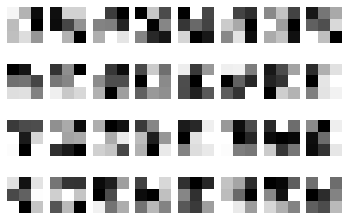

In [9]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

### Deep CNN
Let's consider a deeper model, more precily in this exercise we consider a model composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 
* One 2D convolutional layer with kernel size 2x2 and 16 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function


In [10]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 16)        2064      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5770      
Total params: 8,154
Trainable params: 8,154
Non-trainable params: 0
____________________________________________________

Explain in this cell: 

1.   how the number of parameters on each of the two Conv2D layers is determined;
2.   the reasons why the two considered convolutional layers have a different number of parameters.

Answers:


1.   The conv layer uses sparse connetions and shared weights to have fewer weights than a FC layer. Lets take a look at the first layer in the network with 320 total parameters and 3x3 kernel. The 3x3 kernel gives 9 parameters. Adding a bias term to the kernel and a total of 32 kernels gives (3x3+1)x32 = 320 total parameters. For the second conv layer we have 2064 parameters. These parameters comes from the kernel size of 2x2x32 where 32 is the depth carried over from the previous conv layer. Adding a bias term to these kernels and multiplying by 16 kernels gives us (2x2x32+1)x16 = 2064 parameters.
2.   The different number of parameters comes from the different 2D spatial dimension of the kernels in the different layers and the depth of the activation carried from one conv layer to another.

Let's now train our deep CNN.

Epoch 1/10
430/430 [==============================] - 14s 33ms/step - loss: 1.5713 - accuracy: 0.4784 - val_loss: 0.6569 - val_accuracy: 0.7604
Epoch 2/10
430/430 [==============================] - 14s 31ms/step - loss: 0.6362 - accuracy: 0.7646 - val_loss: 0.5600 - val_accuracy: 0.7984
Epoch 3/10
430/430 [==============================] - 13s 31ms/step - loss: 0.5531 - accuracy: 0.7974 - val_loss: 0.5062 - val_accuracy: 0.8226
Epoch 4/10
430/430 [==============================] - 14s 32ms/step - loss: 0.5022 - accuracy: 0.8180 - val_loss: 0.4626 - val_accuracy: 0.8450
Epoch 5/10
430/430 [==============================] - 14s 32ms/step - loss: 0.4687 - accuracy: 0.8335 - val_loss: 0.4598 - val_accuracy: 0.8388
Epoch 6/10
430/430 [==============================] - 14s 32ms/step - loss: 0.4477 - accuracy: 0.8431 - val_loss: 0.4332 - val_accuracy: 0.8534
Epoch 7/10
430/430 [==============================] - 15s 34ms/step - loss: 0.4296 - accuracy: 0.8501 - val_loss: 0.4234 - val_accuracy:

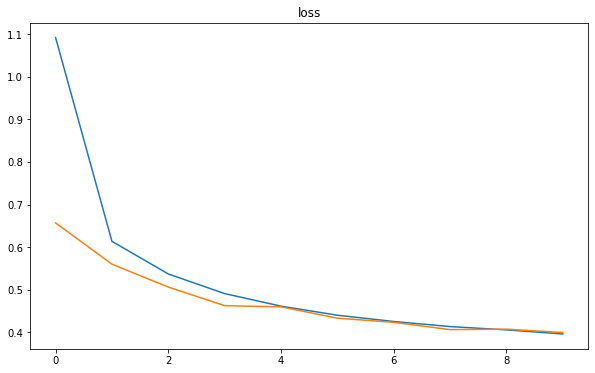

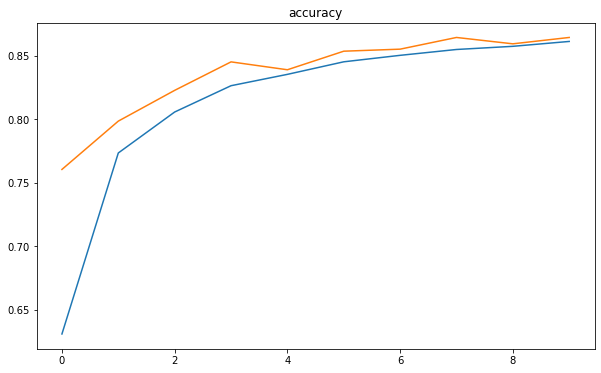

In [11]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

## Exercise 3.2: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

Your task is to modify some of the hyper-parameters of the previous exercise's network and compare the results. At least one of the models you try should have an improvement in the test set results (generalization) over the result of the model used in the previous exercise.
In the cell below report only the code of the **best model** that you can find. In addtion, print out its result on the test set, and plot the accuracy and the loss trends in the notebook you return.
Moreover, for each setup you test, analyze and discuss the obtained results briefly in the last cells at the bottom.

Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*    number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

In [12]:
deep_model_1 = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=[3,3], padding="same", activation="relu", input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='tanh'),
    keras.layers.Dense(10, activation="softmax")
])
deep_model_1.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              metrics=["accuracy"])

deep_model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               401664    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [13]:
story_1 = deep_model_1.fit(X_train, y_train, epochs=20, batch_size=64,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
860/860 [==============================] - 43s 50ms/step - loss: 0.8275 - accuracy: 0.7309 - val_loss: 0.3919 - val_accuracy: 0.8662
Epoch 2/20
860/860 [==============================] - 43s 50ms/step - loss: 0.3806 - accuracy: 0.8630 - val_loss: 0.3420 - val_accuracy: 0.8786
Epoch 3/20
860/860 [==============================] - 51s 60ms/step - loss: 0.3305 - accuracy: 0.8836 - val_loss: 0.3212 - val_accuracy: 0.8864
Epoch 4/20
860/860 [==============================] - 54s 63ms/step - loss: 0.3035 - accuracy: 0.8922 - val_loss: 0.2983 - val_accuracy: 0.8954
Epoch 5/20
860/860 [==============================] - 58s 68ms/step - loss: 0.2734 - accuracy: 0.9024 - val_loss: 0.2765 - val_accuracy: 0.9018
Epoch 6/20
860/860 [==============================] - 52s 61ms/step - loss: 0.2560 - accuracy: 0.9096 - val_loss: 0.2906 - val_accuracy: 0.8912
Epoch 7/20
860/860 [==============================] - 52s 60ms/step - loss: 0.2423 - accuracy: 0.9118 - val_loss: 0.2598 - val_accuracy:

313/313 - 2s - loss: 0.2409 - accuracy: 0.9128
 accuracy: 91.28%
----------------------------


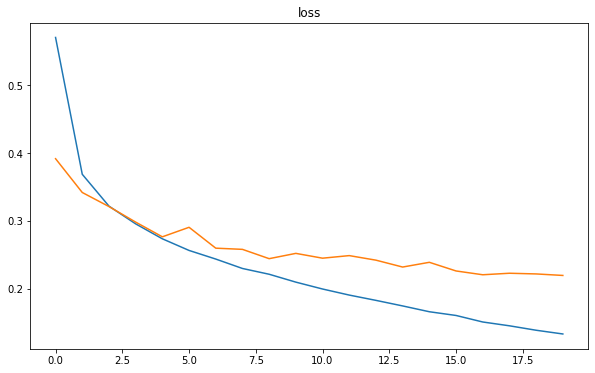

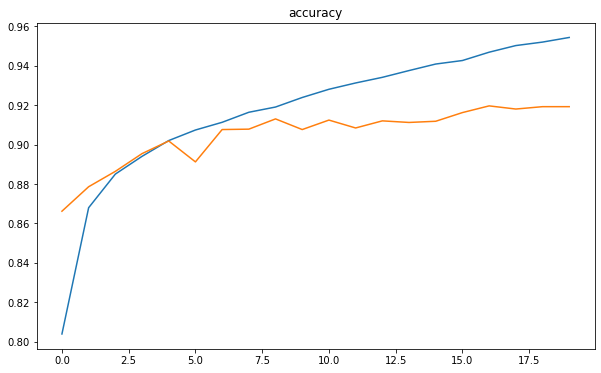

In [14]:
plot_loss(story_1)
plot_accuracy(story_1)

scores = deep_model_1.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

### Example of tests discussion
The best model that I found is the one above.

The achieved accuracy in the test set is 91.28%

Discussion:
This is a significant accuracy increase from the previous networks. Adding more kernels adds more complexity in the feature extraction without adding much computational complexity. Unfortunately, by adding more kernels, the depth of the activation increases which means that we need to add a FC (fully connected) layer. Without this FC layer it is no significant change in accuracy. As seen from the model summary above, adding a new FC layer adds a lot of parameters to the model which makes the training procedure computationally expensive and cumbersome. This cumbersome process could possibly be a lot smoother with sparsely connected layers. Unfortunately I don't know how to implement that in tensorflow, yet. 

Besides, I tested also other models with more convolutional layers, different optimizers, different learning rate and regularization.

More convolution gives better feature extraction, but for this particular dataset that is not necessary and gives no further improvement to the test data. For a more complex dataset, more conv-layers would have been essential to drive up the accuracy. With the different optimizers, it is no doubt that having an adaptive optimization scheme work better than the regular SGD. This will probably also be the case for more complex datasets. With learning rate the key is to find a learning rate such that the accuracy increases. A learning rate too small will require many epochs to optimize the model, while a learning rate too big may make the model diverge from the optimal solution. For this dataset 1e-4 works fine. Towards regularization it didn't contribute to an overall increase in accuracy, but judging from the training and validation loss and accuracy the model seemed to be less overfitting. 